<a href="https://colab.research.google.com/github/aarohishaiva/industry-copper-modelling-Project_4/blob/main/Industrial_Copper_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [81]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv')
df.shape

(181673, 14)

In [82]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [83]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [84]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [85]:
df.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
10719,7F991628-63D3-4B6D-91A1-D34515E315D8,2021-03-18,59.700362,30221720.0,40.0,Won,S,10.0,5.00,2000.0,NaN,640665,2021-08-01,892.0
52534,7B51571D-818A-4B7D-AF4E-FC0F90CD7AF3,2021-01-26,66.812577,30157862.0,32.0,Won,Others,20.0,0.60,1200.0,MZ2500125,164141591,2021-07-01,1021.0
102329,922EE5DB-D7BB-4BA0-A2D0-4FA38FC1C478,2020-11-17,32.733198,30209173.0,32.0,Lost,S,15.0,19.99,1500.0,NaN,640405,2021-02-01,632.0


In [86]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


<Axes: xlabel='width'>

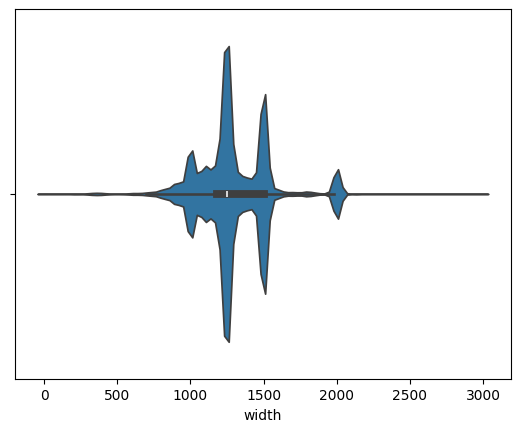

In [87]:
sns.violinplot(x=df["width"])

<Axes: xlabel='application'>

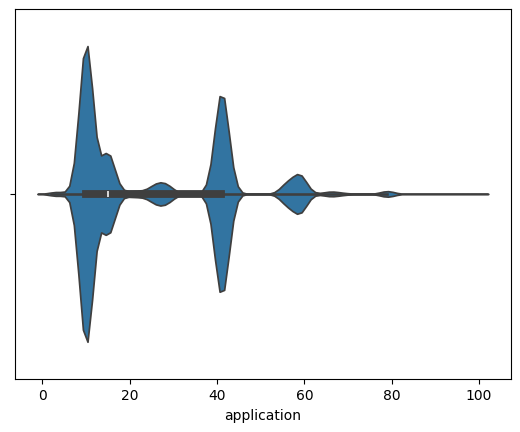

In [88]:
sns.violinplot(x=df["application"])

<Axes: xlabel='country'>

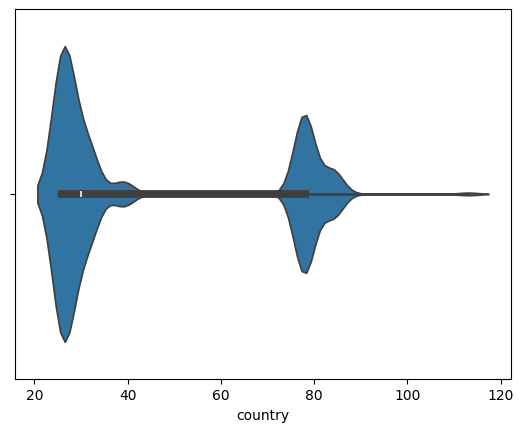

In [89]:
sns.violinplot(x=df["country"])

In [90]:
#exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [91]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [92]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data.
df['material_ref'].fillna('unknown', inplace=True)

In [93]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [94]:
# deleting null values.
df = df.dropna()

<Axes: >

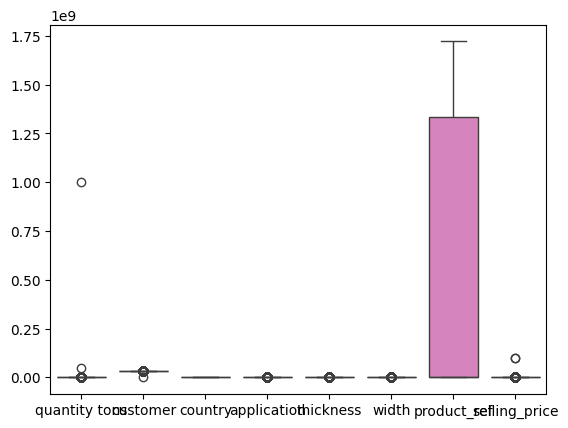

In [95]:
#draw boxplot
sns.boxplot(data = df)

In [96]:
dfr=df.copy()

In [97]:
a = dfr['selling_price'] <= 0
print(a.sum())
dfr.loc[a, 'selling_price'] = np.nan

a = dfr['quantity tons'] <= 0
print(a.sum())
dfr.loc[a, 'quantity tons'] = np.nan

a = dfr['thickness'] <= 0
print(a.sum())

7
4
0


In [98]:
dfr.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

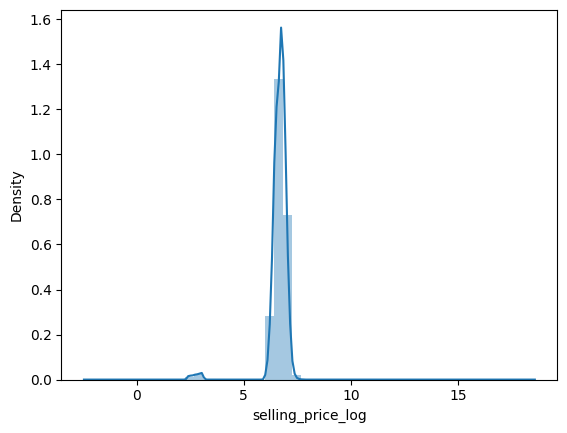

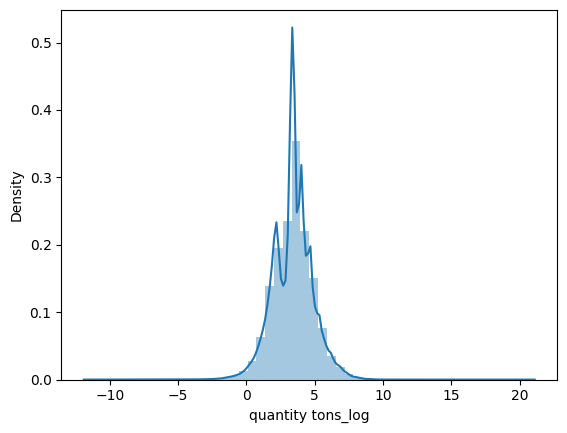

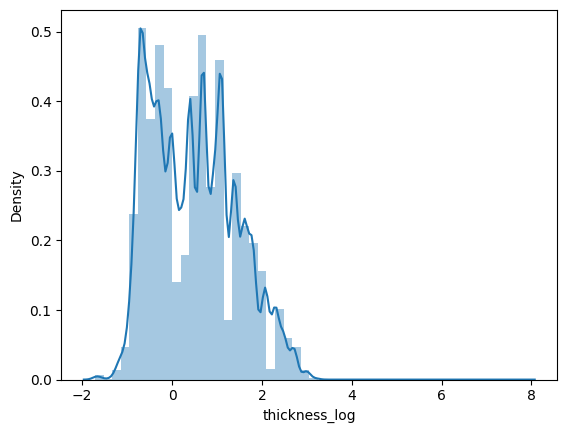

In [99]:
dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'])
plt.show()

dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'])
plt.show()

dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'])
plt.show()
# reverts log
# sns.distplot(df_p['reverted_values'])

In [100]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
dfr.status = OE.fit_transform(dfr[['status']])
dfr['item type'] = OE.fit_transform(dfr[['item type']])

In [101]:
dfr = dfr.dropna()

In [102]:
#Regression
#split data into X, y
X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfr['selling_price_log']

In [103]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [105]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08464529095644657
0.07805457004731131


In [107]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8736436626286413
0.8867180545575358


In [108]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7627437653996635
0.7738696934709421


In [109]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [110]:
#check metrics
from sklearn import metrics

In [111]:
#check MSE
metrics.mean_squared_error(y_test,y_pred)

0.025941210768788754

In [112]:
#check MAE
metrics.mean_absolute_error(y_test, y_pred)

0.11675491153282049

In [113]:
#R2 Score
print(metrics.r2_score(y_test,y_pred))

0.9199502339416625


In [114]:
#Classification
df.status.value_counts()

status
Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [115]:
dfc = df.copy()

In [116]:
dfc = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

150435

In [117]:
dfc.status.value_counts()

status
Won     116004
Lost     34431
Name: count, dtype: int64

In [118]:
#use ordinal encoder to convert categorical data into numerical data
OE = OrdinalEncoder()
dfc.status = OE.fit_transform(dfc[['status']])
dfc['item type'] = OE.fit_transform(dfc[['item type']])

In [119]:
#split data into X, y
X = dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dfc['status']

In [120]:
#apply standard scaler
SS.fit_transform(X)

array([[-0.09139439,  0.09705592,  0.76978981, ..., -0.71017265,
        -0.72507203,  1.6673573 ],
       [ 1.52755772,  0.76054292,  0.76978981, ..., -0.83268141,
        -0.2835426 ,  1.66443363],
       [ 0.66147626, -0.62373848,  1.72295071, ..., -0.62850015,
        -0.74727633, -0.66115687],
       ...,
       [-0.20459491, -0.71081685,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [-4.74988274, -0.77269647,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [ 0.70809988, -0.75206993,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041]])

In [121]:
#split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105304, 9)
(45131, 9)
(105304,)
(45131,)


In [122]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [123]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.8093139861733647
0.8112827103321442


In [124]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9220352503228747
0.8905851853493164


In [125]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8192091468510218
0.8206554253174093


In [126]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8212983362455367
0.821940572998604


In [127]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.7716895844412368
0.7698034610356518


In [128]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.616447136044171

In [129]:
y_predict = xgb_model.predict(X_test)

In [130]:
mean_squared_error(y_test, y_predict)

0.07563450737248835

In [131]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [132]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9309565487137444


In [133]:
knn.predict(X_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [134]:
y_pred= knn.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8209,  2180],
       [ 2758, 31984]])

Text(58.222222222222214, 0.5, 'Truth')

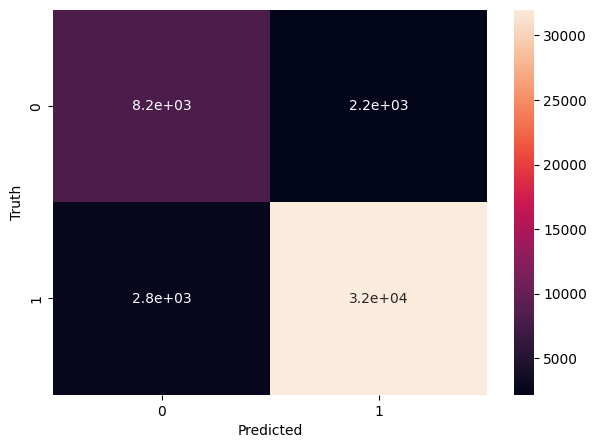

In [136]:
import seaborn as sns

#draw heatmap
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [137]:
!pip install scikit-learn
!pip install --upgrade scikit-learn


In [138]:
import sklearn.metrics as metrics

# Print the available functions and attributes
print(dir(metrics))


['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example ground truth and predicted labels
y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.75
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666
Confusion Matrix:
[[2 0]
 [1 1]]


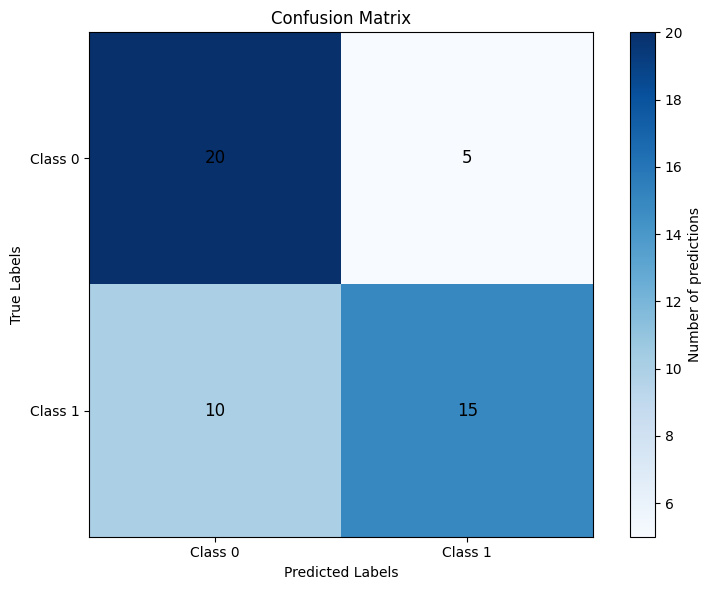

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Example confusion matrix (replace this with your actual confusion matrix)
conf_matrix = np.array([[20, 5],
                        [10, 15]])

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size for better readability
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of predictions')  # Add a colorbar label

# Add labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])

# Add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


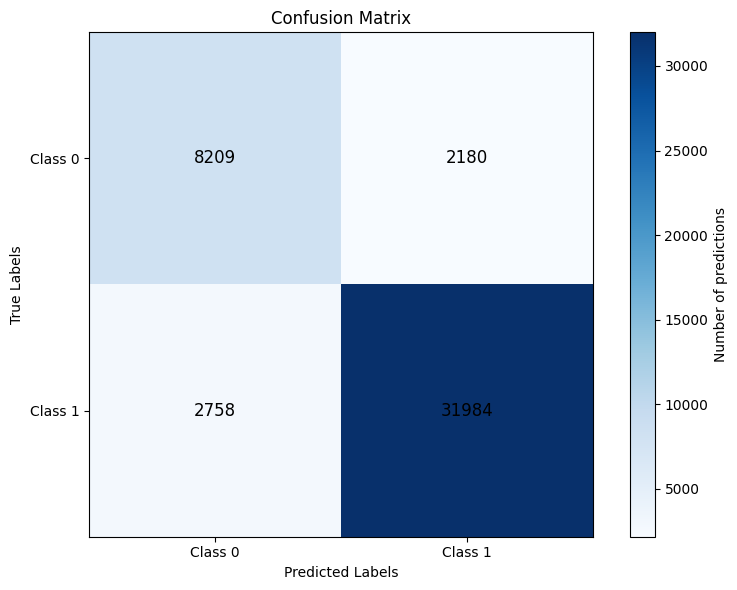

In [142]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Example model predictions and true labels
# Replace knn.predict(X_test) and y_test with your actual variables
y_pred = knn.predict(X_test)
y_true = y_test

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of predictions')

# Add labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(conf_matrix)), ['Class 0', 'Class 1'])
plt.yticks(np.arange(len(conf_matrix)), ['Class 0', 'Class 1'])

# Add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


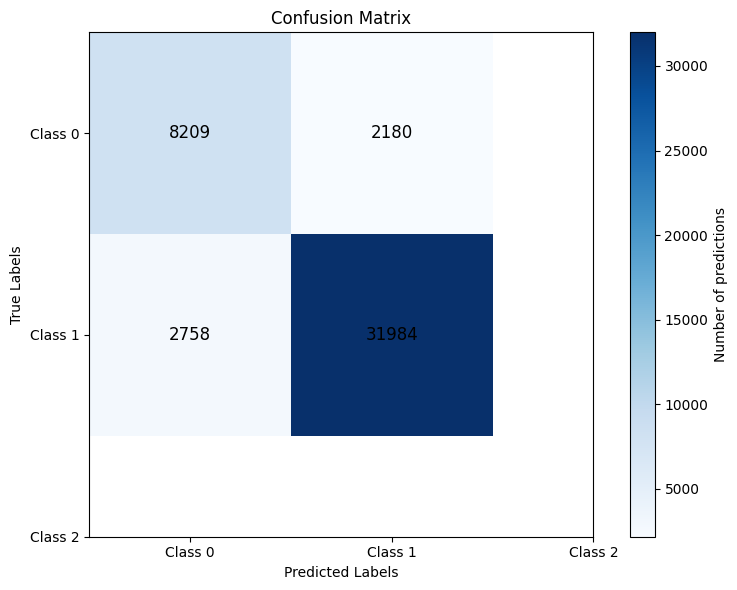

In [143]:
# Example for multi-class (3 classes)
classes = ['Class 0', 'Class 1', 'Class 2']  # Replace with your actual class names

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of predictions')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


In [144]:
!pip install streamlit pyngrok


In [145]:
# Configure ngrok with your authentication token
from pyngrok import ngrok

# Replace this with your actual ngrok authentication token
ngrok.set_auth_token("2iT1S8jORWP8AFT2gipGnOs9RQe_325YotmHc3irE4pTUSuSp")

2024-07-14 10:13:49.849 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-07-14 10:13:50.027 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-07-14 10:13:50.036 No runtime found, using MemoryCacheStorageManager
2024-07-14 10:14:35.161 No runtime found, using MemoryCacheStorageManager
2024-07-14 10:14:35.168 No runtime found, using MemoryCacheStorageManager


DeltaGenerator()

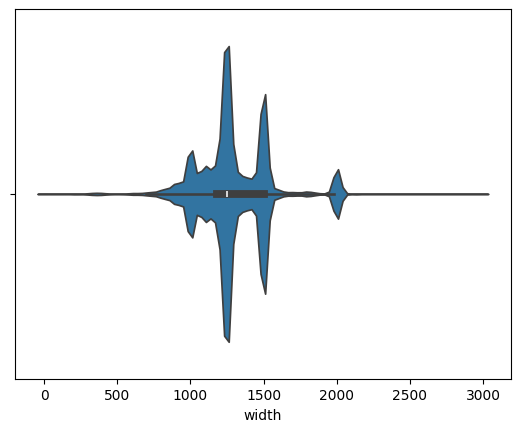

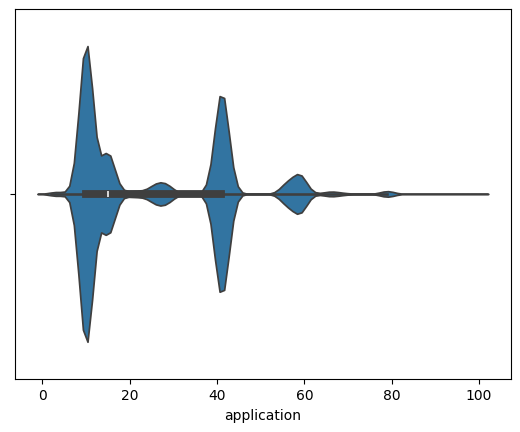

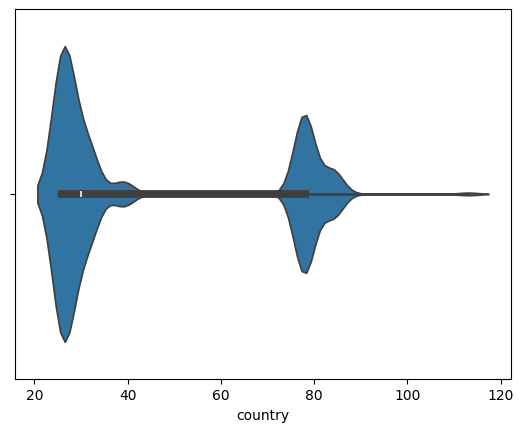

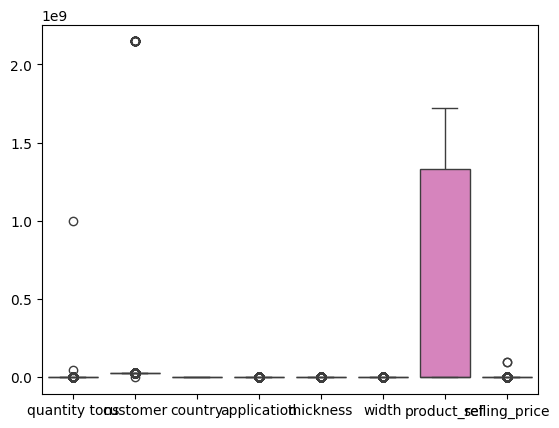

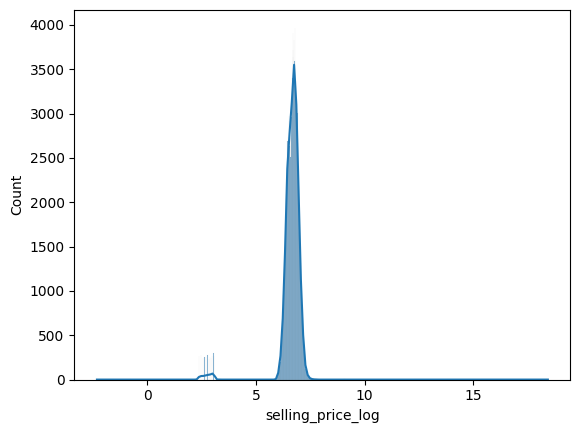

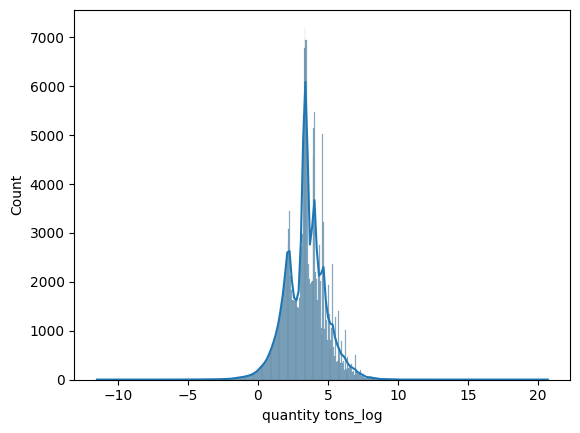

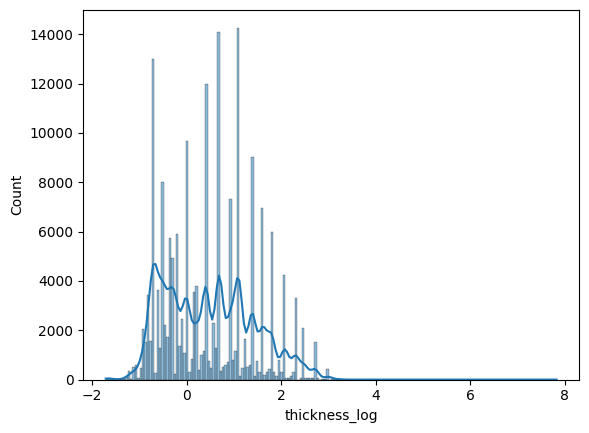

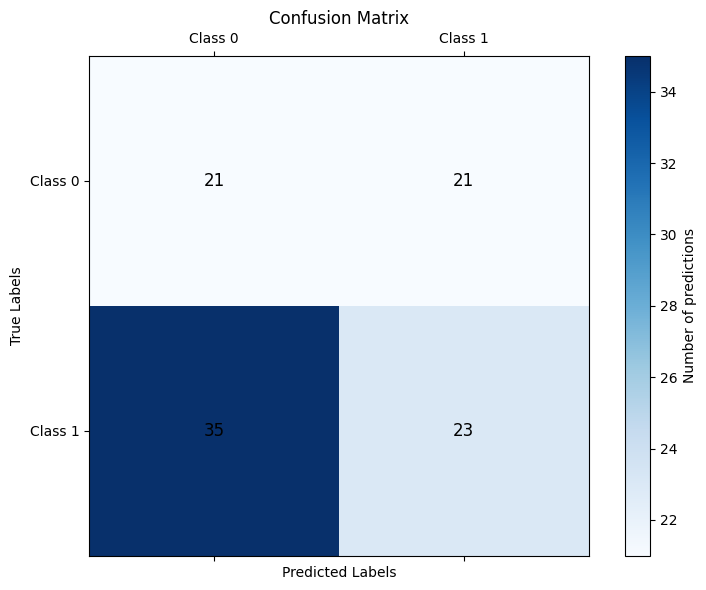

In [152]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import joblib

# Load the dataset
@st.cache_data
def load_data():
    df = pd.read_csv('/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv')
    df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
    df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
    df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
    df['country'] = pd.to_numeric(df['country'], errors='coerce')
    df['application'] = pd.to_numeric(df['application'], errors='coerce')
    df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
    df['width'] = pd.to_numeric(df['width'], errors='coerce')
    df['material_ref'] = df['material_ref'].str.lstrip('0')
    df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
    df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
    df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
    return df

df = load_data()

# Streamlit app
st.title('Copper Industry Data Analysis')

# Data Inspection
st.subheader('Dataset Overview')
st.write(df.head())
st.write(f"Dataset Shape: {df.shape}")

# Violin Plots
st.subheader('Violin Plots')
st.write('Violin plot for width:')
fig, ax = plt.subplots()
sns.violinplot(x=df["width"], ax=ax)
st.pyplot(fig)

st.write('Violin plot for application:')
fig, ax = plt.subplots()
sns.violinplot(x=df["application"], ax=ax)
st.pyplot(fig)

st.write('Violin plot for country:')
fig, ax = plt.subplots()
sns.violinplot(x=df["country"], ax=ax)
st.pyplot(fig)

# Boxplot
st.subheader('Boxplot of Dataset')
fig, ax = plt.subplots()
sns.boxplot(data=df, ax=ax)
st.pyplot(fig)

# Log Transformation and Distribution Plots
st.subheader('Log Transformation and Distribution Plots')

# Ensure 'selling_price' exists in df
if 'selling_price' in df.columns:
    df['selling_price_log'] = np.log(df['selling_price'].replace(0, np.nan))
    st.write('Log-transformed distribution of selling price:')
    fig, ax = plt.subplots()
    sns.histplot(df['selling_price_log'].dropna(), kde=True, ax=ax)
    st.pyplot(fig)

# Ensure 'quantity tons' exists in df
if 'quantity tons' in df.columns:
    df['quantity tons_log'] = np.log(df['quantity tons'].replace(0, np.nan))
    st.write('Log-transformed distribution of quantity tons:')
    fig, ax = plt.subplots()
    sns.histplot(df['quantity tons_log'].dropna(), kde=True, ax=ax)
    st.pyplot(fig)

# Ensure 'thickness' exists in df
if 'thickness' in df.columns:
    df['thickness_log'] = np.log(df['thickness'].replace(0, np.nan))
    st.write('Log-transformed distribution of thickness:')
    fig, ax = plt.subplots()
    sns.histplot(df['thickness_log'].dropna(), kde=True, ax=ax)
    st.pyplot(fig)

# Confusion Matrix Plot
st.subheader('Confusion Matrix Plot')

# Load and display confusion matrix
@st.cache_data
def get_conf_matrix():
    # Assuming you have a pre-trained model
    # Replace these with your actual model and data
    # For demo, using dummy data
    y_true = np.random.randint(0, 2, 100)
    y_pred = np.random.randint(0, 2, 100)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return conf_matrix

conf_matrix = get_conf_matrix()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(cax, ax=ax, label='Number of predictions')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Class 0', 'Class 1'])

# Add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
st.pyplot(fig)



In [158]:
!pip install streamlit pyngrok seaborn joblib
# Install required packages
!pip install streamlit pyngrok

In [159]:
# Save Streamlit app code
app_code = """
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import joblib

# Load the dataset
@st.cache_data
def load_data():
    df = pd.read_csv('/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv')
    df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
    df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
    df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
    df['country'] = pd.to_numeric(df['country'], errors='coerce')
    df['application'] = pd.to_numeric(df['application'], errors='coerce')
    df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
    df['width'] = pd.to_numeric(df['width'], errors='coerce')
    df['material_ref'] = df['material_ref'].str.lstrip('0')
    df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
    df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
    df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
    return df

df = load_data()

# Streamlit app
st.title('Copper Industry Data Analysis')

# Data Inspection
st.subheader('Dataset Overview')
st.write(df.head())
st.write(f"Dataset Shape: {df.shape}")

# Violin Plots
st.subheader('Violin Plots')
st.write('Violin plot for width:')
fig, ax = plt.subplots()
sns.violinplot(x=df["width"], ax=ax)
st.pyplot(fig)

st.write('Violin plot for application:')
fig, ax = plt.subplots()
sns.violinplot(x=df["application"], ax=ax)
st.pyplot(fig)

st.write('Violin plot for country:')
fig, ax = plt.subplots()
sns.violinplot(x=df["country"], ax=ax)
st.pyplot(fig)

# Boxplot
st.subheader('Boxplot of Dataset')
fig, ax = plt.subplots()
sns.boxplot(data=df, ax=ax)
st.pyplot(fig)

# Log Transformation and Distribution Plots
st.subheader('Log Transformation and Distribution Plots')

# Ensure 'selling_price' exists in df
if 'selling_price' in df.columns:
    df['selling_price_log'] = np.log(df['selling_price'].replace(0, np.nan))
    st.write('Log-transformed distribution of selling price:')
    fig, ax = plt.subplots()
    sns.histplot(df['selling_price_log'].dropna(), kde=True, ax=ax)
    st.pyplot(fig)

# Ensure 'quantity tons' exists in df
if 'quantity tons' in df.columns:
    df['quantity tons_log'] = np.log(df['quantity tons'].replace(0, np.nan))
    st.write('Log-transformed distribution of quantity tons:')
    fig, ax = plt.subplots()
    sns.histplot(df['quantity tons_log'].dropna(), kde=True, ax=ax)
    st.pyplot(fig)

# Ensure 'thickness' exists in df
if 'thickness' in df.columns:
    df['thickness_log'] = np.log(df['thickness'].replace(0, np.nan))
    st.write('Log-transformed distribution of thickness:')
    fig, ax = plt.subplots()
    sns.histplot(df['thickness_log'].dropna(), kde=True, ax=ax)
    st.pyplot(fig)

# Confusion Matrix Plot
st.subheader('Confusion Matrix Plot')

# Load and display confusion matrix
@st.cache_data
def get_conf_matrix():
    # Assuming you have a pre-trained model
    # Replace these with your actual model and data
    # For demo, using dummy data
    y_true = np.random.randint(0, 2, 100)
    y_pred = np.random.randint(0, 2, 100)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return conf_matrix

conf_matrix = get_conf_matrix()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(cax, ax=ax, label='Number of predictions')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Class 0', 'Class 1'])

# Add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
st.pyplot(fig)
"""

with open('app.py', 'w') as f:
    f.write(app_code)





In [164]:
from pyngrok import ngrok

# Open a tunnel to the streamlit port, explicitly specifying HTTP
public_url = ngrok.connect(8501, "http")
print(f'Streamlit app is live at: {public_url}')

# Start Streamlit app
!streamlit run app.py &

Streamlit app is live at: NgrokTunnel: "https://67ef-34-42-225-81.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.225.81:8501

/content/app.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Copper_Set.xlsx - Result 1.csv')
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
  Stopping...
